<a href="https://colab.research.google.com/github/asiagromasia/ShelterAnimals/blob/main/ShelterAnimals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

*We were given 2 sets of data train and test.
Train data became our data to work with.*

In [ ]:
data = pd.read_csv('train.csv')
data

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan
...,...,...,...,...,...,...,...,...,...,...
26724,A702446,NaN,2015-05-14 11:56:00,Transfer,Partner,Cat,Intact Male,1 month,Domestic Shorthair Mix,Brown Tabby/White
26725,A718934,NaN,2016-01-20 18:59:00,Transfer,SCRP,Cat,Spayed Female,3 months,Domestic Shorthair Mix,Brown Tabby
26726,A698128,Zeus,2015-03-09 13:33:00,Adoption,NaN,Dog,Neutered Male,4 years,Old English Bulldog Mix,White/Tan
26727,A677478,NaN,2014-04-27 12:22:00,Transfer,Partner,Cat,Intact Male,4 weeks,Domestic Shorthair Mix,Black


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

#**CLEANING DATA:**

In [ ]:
#making a copy of Dataframe to modify
df_copy = data.copy()
df_copy2 = data.copy()

#Checking how many values are Null or NaN 

In [ ]:
df_copy.isnull().sum()


AnimalID              0
Name               7691
DateTime              0
OutcomeType           0
OutcomeSubtype    13612
AnimalType            0
SexuponOutcome        1
AgeuponOutcome       18
Breed                 0
Color                 0
dtype: int64

In [ ]:
#Because there are a few Nan (18 total), we will drop them
#Dropping values are Null or Nan in Column AgeuponOutcome
df_copy.dropna(subset= ['AgeuponOutcome'],inplace=True)
df_copy.AgeuponOutcome.isnull().sum()


0

In [ ]:
#Checking for Nan values again to confirm dropped values
df_copy.isnull().sum()

AnimalID              0
Name               7673
DateTime              0
OutcomeType           0
OutcomeSubtype    13612
AnimalType            0
SexuponOutcome        1
AgeuponOutcome        0
Breed                 0
Color                 0
dtype: int64

***Sex Upon Outcome***

In [ ]:
#Modifying and dropping Unknown and nan
df_copy.dropna(subset=['SexuponOutcome'],inplace=True)

#dropping unknown
# Get indexes where name column has value unknown
indexToDrop = df_copy[df_copy['SexuponOutcome'] == 'Unknown'].index

# Delete these row indexes from dataFrame
df_copy.drop(indexToDrop , inplace=True)

#Verifying unwanted values have been dropped
df_copy.SexuponOutcome.unique()

array(['Neutered Male', 'Spayed Female', 'Intact Male', 'Intact Female'],
      dtype=object)

# Organizing data for better visualisation 




In [ ]:
#Organizing data for outcome based on breed, species, and color
data_dog_1 = data[data['AnimalType'] == 'Dog']
data_cat_1 = data[data['AnimalType'] == 'Cat']
data_dog_1b = data_dog_1.set_index(["Breed", "AnimalID"]).count(level="Breed")
data_cat_1b = data_cat_1.set_index(["Breed", "AnimalID"]).count(level="Breed")
data_dog_2b = data_dog_1b.drop(['DateTime','Name', 'OutcomeType', 'OutcomeSubtype', 'SexuponOutcome', 'AgeuponOutcome','Color'], axis=1)
data_cat_2b = data_cat_1b.drop(['DateTime','Name', 'OutcomeType', 'OutcomeSubtype', 'SexuponOutcome', 'AgeuponOutcome','Color'], axis=1)
data_dog_2b = data_dog_2b.rename(columns={"AnimalType": "Count"})
data_cat_2b = data_cat_2b.rename(columns={"AnimalType": "Count"})
data_dog_2b = data_dog_2b.sort_values(by=['Count'])
data_cat_2b = data_cat_2b.sort_values(by=['Count'])
data_dog_2b_top = data_dog_2b[data_dog_2b['Count'] >= 367]
data_cat_2b_top = data_cat_2b[data_cat_2b['Count'] >= 143]
data_dog_2b_bottom = data_dog_2b[data_dog_2b['Count'] < 367]
data_cat_2b_bottom = data_cat_2b[data_cat_2b['Count'] < 143]
data_dog_3b = data_dog_2b_top
data_dog_3b.loc[len(data_dog_3b.index)] = [9618]
data_dog_3b = data_dog_3b.rename({5: 'Other'}, axis='index')
data_dog_1c = data_dog_1.set_index(["Color", "AnimalID"]).count(level="Color")
data_cat_1c = data_cat_1.set_index(["Color", "AnimalID"]).count(level="Color")
data_dog_2c = data_dog_1c.drop(['DateTime','Name', 'OutcomeType', 'OutcomeSubtype', 'SexuponOutcome', 'AgeuponOutcome','Breed'], axis=1)
data_cat_2c = data_cat_1c.drop(['DateTime','Name', 'OutcomeType', 'OutcomeSubtype', 'SexuponOutcome', 'AgeuponOutcome','Breed'], axis=1)
data_dog_2c = data_dog_2c.rename(columns={"AnimalType": "Count"})
data_cat_2c = data_cat_2c.rename(columns={"AnimalType": "Count"})
data_dog_2c = data_dog_2c.sort_values(by=['Count'])
data_cat_2c = data_cat_2c.sort_values(by=['Count'])
data_dog_2c_top = data_dog_2c[data_dog_2c['Count'] >= 773]
data_cat_2c_top = data_cat_2c[data_cat_2c['Count'] >= 841]
data_dog_2c_bottom = data_dog_2c[data_dog_2c['Count'] < 773]
data_cat_2c_bottom = data_cat_2c[data_cat_2c['Count'] < 841]
data_dog_3c = data_dog_2c_top
data_dog_3c.loc[len(data_dog_3c.index)] = [10553]
data_dog_3c = data_dog_3c.rename({5: 'Other'}, axis='index')
data_cat_3c = data_cat_2c_top
data_cat_3c.loc[len(data_cat_3c.index)] = [5183]
data_cat_3c = data_cat_3c.rename({5: 'Other'}, axis='index')
data_dog_breeds = data_dog_1
data_dog_breeds = data_dog_breeds.drop(['AnimalID', 'Name', 'DateTime', 'OutcomeSubtype', 'AnimalType', 'SexuponOutcome', 'AgeuponOutcome', 'Color'], axis=1)
dog_breed_list = ['Australian Cattle Dog Mix', 'German Shepherd Mix', 'Labrador Retriever Mix', 'Chihuahua Shorthair Mix', 'Pit Bull Mix']
for x in range(len(data_dog_breeds.index)):
    if data_dog_breeds.iloc[x]['Breed'] not in dog_breed_list:
        data_dog_breeds.iloc[x]['Breed'] = 'Other'
data_cat_breeds = data_cat_1
data_cat_breeds = data_cat_breeds.drop(['AnimalID', 'Name', 'DateTime', 'OutcomeSubtype', 'AnimalType', 'SexuponOutcome', 'AgeuponOutcome', 'Color'], axis=1)
cat_breed_list = ['Domestic Shorthair', 'Siamese Mix', 'Domestic Longhair Mix', 'Domestic Medium Hair Mix', 'Domestic Shorthair Mix']
for x in range(len(data_cat_breeds.index)):
    if data_cat_breeds.iloc[x]['Breed'] not in cat_breed_list:
        data_cat_breeds.iloc[x]['Breed'] = 'Other'
data_dog_colors = data_dog_1
data_dog_colors = data_dog_colors.drop(['AnimalID', 'Name', 'DateTime', 'OutcomeSubtype', 'AnimalType', 'SexuponOutcome', 'AgeuponOutcome', 'Breed'], axis=1)
dog_color_list = ['Tan/White', 'White', 'Black', 'Brown/White', 'Black/White']
for x in range(len(data_dog_colors.index)):
    if data_dog_colors.iloc[x]['Color'] not in dog_color_list:
        data_dog_colors.iloc[x]['Color'] = 'Other'
data_cat_colors = data_cat_1
data_cat_colors = data_cat_colors.drop(['AnimalID', 'Name', 'DateTime', 'OutcomeSubtype', 'AnimalType', 'SexuponOutcome', 'AgeuponOutcome', 'Breed'], axis=1)
cat_color_list = ['Orange Tabby', 'Brown Tabby/White', 'Black/White', 'Black', 'Brown Tabby']
for x in range(len(data_cat_colors.index)):
    if data_cat_colors.iloc[x]['Color'] not in cat_color_list:
        data_cat_colors.iloc[x]['Color'] = 'Other'
outcome_bins = ['Euthanasia', 'Transfer', 'Return_to_owner', 'Adoption', 'Died']
df_dog_breed_ac = data_dog_breeds[data_dog_breeds['Breed']=='Australian Cattle Dog Mix']
df_dog_breed_gs = data_dog_breeds[data_dog_breeds['Breed']=='German Shepherd Mix']
df_dog_breed_lr = data_dog_breeds[data_dog_breeds['Breed']=='Labrador Retriever Mix']
df_dog_breed_cs = data_dog_breeds[data_dog_breeds['Breed']=='Chihuahua Shorthair Mix']
df_dog_breed_pb = data_dog_breeds[data_dog_breeds['Breed']=='Pit Bull Mix']
df_dog_breed_o = data_dog_breeds[data_dog_breeds['Breed']=='Other']
dog_breeds_list = [df_dog_breed_ac, df_dog_breed_gs, df_dog_breed_lr, df_dog_breed_cs, df_dog_breed_pb, df_dog_breed_o]
df_dog_breed_outcomes = pd.DataFrame(columns = ['OutcomeType', 'Breed', 'Percentage'])
for x in range(len(dog_breeds_list)):
    total = dog_breeds_list[x].count().OutcomeType
    breed = dog_breeds_list[x].iloc[0]["Breed"]
    new_row = {'OutcomeType': 'Adoption', 'Breed': breed, 'Percentage': (dog_breeds_list[x][dog_breeds_list[x]['OutcomeType'] == 'Adoption'].count().OutcomeType/total)*100}
    df_dog_breed_outcomes = df_dog_breed_outcomes.append(new_row, ignore_index=True)
    new_row = {'OutcomeType': 'Died', 'Breed': breed, 'Percentage': (dog_breeds_list[x][dog_breeds_list[x]['OutcomeType'] == 'Died'].count().OutcomeType/total)*100}
    df_dog_breed_outcomes = df_dog_breed_outcomes.append(new_row, ignore_index=True)
    new_row = {'OutcomeType': 'Return_to_owner', 'Breed': breed, 'Percentage': (dog_breeds_list[x][dog_breeds_list[x]['OutcomeType'] == 'Return_to_owner'].count().OutcomeType/total)*100}
    df_dog_breed_outcomes = df_dog_breed_outcomes.append(new_row, ignore_index=True)
    new_row = {'OutcomeType': 'Euthanasia', 'Breed': breed, 'Percentage': (dog_breeds_list[x][dog_breeds_list[x]['OutcomeType'] == 'Euthanasia'].count().OutcomeType/total)*100}
    df_dog_breed_outcomes = df_dog_breed_outcomes.append(new_row, ignore_index=True)
    new_row = {'OutcomeType': 'Transfer', 'Breed': breed, 'Percentage': (dog_breeds_list[x][dog_breeds_list[x]['OutcomeType'] == 'Transfer'].count().OutcomeType/total)*100}
    df_dog_breed_outcomes = df_dog_breed_outcomes.append(new_row, ignore_index=True)
df_cat_breed_ds = data_cat_breeds[data_cat_breeds['Breed']=='Domestic Shorthair']
df_cat_breed_sm = data_cat_breeds[data_cat_breeds['Breed']=='Siamese Mix']
df_cat_breed_dlm = data_cat_breeds[data_cat_breeds['Breed']=='Domestic Longhair Mix']
df_cat_breed_dmh = data_cat_breeds[data_cat_breeds['Breed']=='Domestic Medium Hair Mix']
df_cat_breed_dsm = data_cat_breeds[data_cat_breeds['Breed']=='Domestic Shorthair Mix']
df_cat_breed_o = data_cat_breeds[data_cat_breeds['Breed']=='Other']
cat_breeds_list = [df_cat_breed_ds, df_cat_breed_sm, df_cat_breed_dlm, df_cat_breed_dmh, df_cat_breed_dsm, df_cat_breed_o]
df_cat_breed_outcomes = pd.DataFrame(columns = ['OutcomeType', 'Breed', 'Percentage'])
for x in range(len(cat_breeds_list)):
    total = cat_breeds_list[x].count().OutcomeType
    breed = cat_breeds_list[x].iloc[0]["Breed"]
    new_row = {'OutcomeType': 'Adoption', 'Breed': breed, 'Percentage': (cat_breeds_list[x][cat_breeds_list[x]['OutcomeType'] == 'Adoption'].count().OutcomeType/total)*100}
    df_cat_breed_outcomes = df_cat_breed_outcomes.append(new_row, ignore_index=True)
    new_row = {'OutcomeType': 'Died', 'Breed': breed, 'Percentage': (cat_breeds_list[x][cat_breeds_list[x]['OutcomeType'] == 'Died'].count().OutcomeType/total)*100}
    df_cat_breed_outcomes = df_cat_breed_outcomes.append(new_row, ignore_index=True)
    new_row = {'OutcomeType': 'Return_to_owner', 'Breed': breed, 'Percentage': (cat_breeds_list[x][cat_breeds_list[x]['OutcomeType'] == 'Return_to_owner'].count().OutcomeType/total)*100}
    df_cat_breed_outcomes = df_cat_breed_outcomes.append(new_row, ignore_index=True)
    new_row = {'OutcomeType': 'Euthanasia', 'Breed': breed, 'Percentage': (cat_breeds_list[x][cat_breeds_list[x]['OutcomeType'] == 'Euthanasia'].count().OutcomeType/total)*100}
    df_cat_breed_outcomes = df_cat_breed_outcomes.append(new_row, ignore_index=True)
    new_row = {'OutcomeType': 'Transfer', 'Breed': breed, 'Percentage': (cat_breeds_list[x][cat_breeds_list[x]['OutcomeType'] == 'Transfer'].count().OutcomeType/total)*100}
    df_cat_breed_outcomes = df_cat_breed_outcomes.append(new_row, ignore_index=True)
df_cat_color_ot = data_cat_colors[data_cat_colors['Color']=='Orange Tabby']
df_cat_color_btw = data_cat_colors[data_cat_colors['Color']=='Brown Tabby/White']
df_cat_color_bw = data_cat_colors[data_cat_colors['Color']=='Black/White']
df_cat_color_b = data_cat_colors[data_cat_colors['Color']=='Black']
df_cat_color_bt = data_cat_colors[data_cat_colors['Color']=='Brown Tabby']
df_cat_color_o = data_cat_colors[data_cat_colors['Color']=='Other']
cat_colors_list = [df_cat_color_ot, df_cat_color_btw, df_cat_color_bw, df_cat_color_b, df_cat_color_bt, df_cat_color_o]
df_cat_color_outcomes = pd.DataFrame(columns = ['OutcomeType', 'Color', 'Percentage'])
for x in range(len(cat_colors_list)):
    total = cat_colors_list[x].count().OutcomeType
    color = cat_colors_list[x].iloc[0]["Color"]
    new_row = {'OutcomeType': 'Adoption', 'Color': color, 'Percentage': (cat_colors_list[x][cat_colors_list[x]['OutcomeType'] == 'Adoption'].count().OutcomeType/total)*100}
    df_cat_color_outcomes = df_cat_color_outcomes.append(new_row, ignore_index=True)
    new_row = {'OutcomeType': 'Died', 'Color': color, 'Percentage': (cat_colors_list[x][cat_colors_list[x]['OutcomeType'] == 'Died'].count().OutcomeType/total)*100}
    df_cat_color_outcomes = df_cat_color_outcomes.append(new_row, ignore_index=True)
    new_row = {'OutcomeType': 'Return_to_owner', 'Color': color, 'Percentage': (cat_colors_list[x][cat_colors_list[x]['OutcomeType'] == 'Return_to_owner'].count().OutcomeType/total)*100}
    df_cat_color_outcomes = df_cat_color_outcomes.append(new_row, ignore_index=True)
    new_row = {'OutcomeType': 'Euthanasia', 'Color': color, 'Percentage': (cat_colors_list[x][cat_colors_list[x]['OutcomeType'] == 'Euthanasia'].count().OutcomeType/total)*100}
    df_cat_color_outcomes = df_cat_color_outcomes.append(new_row, ignore_index=True)
    new_row = {'OutcomeType': 'Transfer', 'Color': color, 'Percentage': (cat_colors_list[x][cat_colors_list[x]['OutcomeType'] == 'Transfer'].count().OutcomeType/total)*100}
    df_cat_color_outcomes = df_cat_color_outcomes.append(new_row, ignore_index=True)
df_dog_color_ot = data_dog_colors[data_dog_colors['Color']=='Tan/White']
df_dog_color_btw = data_dog_colors[data_dog_colors['Color']=='White']
df_dog_color_bw = data_dog_colors[data_dog_colors['Color']=='Black']
df_dog_color_b = data_dog_colors[data_dog_colors['Color']=='Brown/White']
df_dog_color_bt = data_dog_colors[data_dog_colors['Color']=='Black/White']
df_dog_color_o = data_dog_colors[data_dog_colors['Color']=='Other']
dog_colors_list = [df_dog_color_ot, df_dog_color_btw, df_dog_color_bw, df_dog_color_b, df_dog_color_bt, df_dog_color_o]
df_dog_color_outcomes = pd.DataFrame(columns = ['OutcomeType', 'Color', 'Percentage'])
for x in range(len(dog_colors_list)):
    total = dog_colors_list[x].count().OutcomeType
    color = dog_colors_list[x].iloc[0]["Color"]
    new_row = {'OutcomeType': 'Adoption', 'Color': color, 'Percentage': (dog_colors_list[x][dog_colors_list[x]['OutcomeType'] == 'Adoption'].count().OutcomeType/total)*100}
    df_dog_color_outcomes = df_dog_color_outcomes.append(new_row, ignore_index=True)
    new_row = {'OutcomeType': 'Died', 'Color': color, 'Percentage': (dog_colors_list[x][dog_colors_list[x]['OutcomeType'] == 'Died'].count().OutcomeType/total)*100}
    df_dog_color_outcomes = df_dog_color_outcomes.append(new_row, ignore_index=True)
    new_row = {'OutcomeType': 'Return_to_owner', 'Color': color, 'Percentage': (dog_colors_list[x][dog_colors_list[x]['OutcomeType'] == 'Return_to_owner'].count().OutcomeType/total)*100}
    df_dog_color_outcomes = df_dog_color_outcomes.append(new_row, ignore_index=True)
    new_row = {'OutcomeType': 'Euthanasia', 'Color': color, 'Percentage': (dog_colors_list[x][dog_colors_list[x]['OutcomeType'] == 'Euthanasia'].count().OutcomeType/total)*100}
    df_dog_color_outcomes = df_dog_color_outcomes.append(new_row, ignore_index=True)
    new_row = {'OutcomeType': 'Transfer', 'Color': color, 'Percentage': (dog_colors_list[x][dog_colors_list[x]['OutcomeType'] == 'Transfer'].count().OutcomeType/total)*100}
    df_dog_color_outcomes = df_dog_color_outcomes.append(new_row, ignore_index=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


***Age upon Outcome***

In [ ]:
#List unique values in the data['AgeuponOutcome'] column
uniqueAges= df_copy.AgeuponOutcome.unique()
uniqueAges

array(['1 year', '2 years', '3 weeks', '1 month', '5 months', '4 years',
       '3 months', '2 weeks', '2 months', '10 months', '6 months',
       '5 years', '7 years', '3 years', '4 months', '12 years', '9 years',
       '6 years', '1 weeks', '11 years', '7 months', '8 years',
       '11 months', '4 days', '4 weeks', '9 months', '8 months',
       '15 years', '10 years', '14 years', '3 days', '5 weeks', '2 days',
       '16 years', '6 days', '1 day', '13 years', '1 week', '17 years',
       '0 years', '18 years', '5 days', '19 years', '20 years'],
      dtype=object)

**Changing values of column AgeuponOutcome to puppy, adolescent, adult and senior instead of 1 week, 1 year, etc..**

1. ***Dog Age <= 6 months  = Puppy***
1. ***Cat Age <= 6 months  = Kitten***
2. ***Pets 6 months > or <= 1 year are Adolescents***
1. ***Pets 2 years >= or <= 7 years are Adults***
2. ***Pets >= 8 years are Seniors***





In [ ]:
df_copy.AgeuponOutcome.unique()

array(['1 year', '2 years', '3 weeks', '1 month', '5 months', '4 years',
       '3 months', '2 weeks', '2 months', '10 months', '6 months',
       '5 years', '7 years', '3 years', '4 months', '12 years', '9 years',
       '6 years', '1 weeks', '11 years', '7 months', '8 years',
       '11 months', '4 days', '4 weeks', '9 months', '8 months',
       '15 years', '10 years', '14 years', '3 days', '5 weeks', '2 days',
       '16 years', '6 days', '1 day', '13 years', '1 week', '17 years',
       '0 years', '18 years', '5 days', '19 years', '20 years'],
      dtype=object)

In [ ]:
#puppy replace
df_copy.loc[(df_copy['AgeuponOutcome'] == '0 years') & (df_copy['AnimalType'] == "Dog"),'AgeuponOutcome']= "Puppy"
df_copy.loc[(df_copy['AgeuponOutcome'] == '1 day') & (df_copy['AnimalType'] == "Dog"),'AgeuponOutcome']= "Puppy"
df_copy.loc[(df_copy['AgeuponOutcome'] == '2 days') & (df_copy['AnimalType'] == "Dog"),'AgeuponOutcome']= "Puppy"
df_copy.loc[(df_copy['AgeuponOutcome'] == '3 days') & (df_copy['AnimalType'] == "Dog"),'AgeuponOutcome']= "Puppy"
df_copy.loc[(df_copy['AgeuponOutcome'] == '4 days') & (df_copy['AnimalType'] == "Dog"),'AgeuponOutcome']= "Puppy"
df_copy.loc[(df_copy['AgeuponOutcome'] == '5 days') & (df_copy['AnimalType'] == "Dog"),'AgeuponOutcome']= "Puppy"
df_copy.loc[(df_copy['AgeuponOutcome'] == '6 days') & (df_copy['AnimalType'] == "Dog"),'AgeuponOutcome']= "Puppy"


df_copy.loc[(df_copy['AgeuponOutcome'] == '1 week') & (df_copy['AnimalType'] == "Dog"),'AgeuponOutcome']= "Puppy"
df_copy.loc[(df_copy['AgeuponOutcome'] == '1 weeks') & (df_copy['AnimalType'] == "Dog"),'AgeuponOutcome']= "Puppy"
df_copy.loc[(df_copy['AgeuponOutcome'] == '2 weeks') & (df_copy['AnimalType'] == "Dog"),'AgeuponOutcome']= "Puppy"
df_copy.loc[(df_copy['AgeuponOutcome'] == '3 weeks') & (df_copy['AnimalType'] == "Dog"),'AgeuponOutcome']= "Puppy"
df_copy.loc[(df_copy['AgeuponOutcome'] == '4 weeks') & (df_copy['AnimalType'] == "Dog"),'AgeuponOutcome']= "Puppy"
df_copy.loc[(df_copy['AgeuponOutcome'] == '5 weeks') & (df_copy['AnimalType'] == "Dog"),'AgeuponOutcome']= "Puppy"


df_copy.loc[(df_copy['AgeuponOutcome'] == '1 month') & (df_copy['AnimalType'] == "Dog"),'AgeuponOutcome']= "Puppy"
df_copy.loc[(df_copy['AgeuponOutcome'] == '2 months') & (df_copy['AnimalType'] == "Dog"),'AgeuponOutcome']= "Puppy"
df_copy.loc[(df_copy['AgeuponOutcome'] == '3 months') & (df_copy['AnimalType'] == "Dog"),'AgeuponOutcome']= "Puppy"
df_copy.loc[(df_copy['AgeuponOutcome'] == '4 months') & (df_copy['AnimalType'] == "Dog"),'AgeuponOutcome']= "Puppy"
df_copy.loc[(df_copy['AgeuponOutcome'] == '5 months') & (df_copy['AnimalType'] == "Dog"),'AgeuponOutcome']= "Puppy"
df_copy.loc[(df_copy['AgeuponOutcome'] == '6 months') & (df_copy['AnimalType'] == "Dog"),'AgeuponOutcome']= "Puppy"


#Kitten replace


df_copy.loc[(df_copy['AgeuponOutcome'] == '0 years') & (df_copy['AnimalType'] == "Cat"),'AgeuponOutcome']= "Kitten"
df_copy.loc[(df_copy['AgeuponOutcome'] == '1 day') & (df_copy['AnimalType'] == "Cat"),'AgeuponOutcome']= "Kitten"
df_copy.loc[(df_copy['AgeuponOutcome'] == '2 days') & (df_copy['AnimalType'] == "Cat"),'AgeuponOutcome']= "Kitten"
df_copy.loc[(df_copy['AgeuponOutcome'] == '3 days') & (df_copy['AnimalType'] == "Cat"),'AgeuponOutcome']= "Kitten"
df_copy.loc[(df_copy['AgeuponOutcome'] == '4 days') & (df_copy['AnimalType'] == "Cat"),'AgeuponOutcome']= "Kitten"
df_copy.loc[(df_copy['AgeuponOutcome'] == '5 days') & (df_copy['AnimalType'] == "Cat"),'AgeuponOutcome']= "Kitten"
df_copy.loc[(df_copy['AgeuponOutcome'] == '6 days') & (df_copy['AnimalType'] == "Cat"),'AgeuponOutcome']= "Kitten"


df_copy.loc[(df_copy['AgeuponOutcome'] == '1 week') & (df_copy['AnimalType'] == "Cat"),'AgeuponOutcome']= "Kitten"
df_copy.loc[(df_copy['AgeuponOutcome'] == '1 weeks') & (df_copy['AnimalType'] == "Cat"),'AgeuponOutcome']= "Kitten"
df_copy.loc[(df_copy['AgeuponOutcome'] == '2 weeks') & (df_copy['AnimalType'] == "Cat"),'AgeuponOutcome']= "Kitten"
df_copy.loc[(df_copy['AgeuponOutcome'] == '3 weeks') & (df_copy['AnimalType'] == "Cat"),'AgeuponOutcome']= "Kitten"
df_copy.loc[(df_copy['AgeuponOutcome'] == '4 weeks') & (df_copy['AnimalType'] == "Cat"),'AgeuponOutcome']= "Kitten"
df_copy.loc[(df_copy['AgeuponOutcome'] == '5 weeks') & (df_copy['AnimalType'] == "Cat"),'AgeuponOutcome']= "Kitten"


df_copy.loc[(df_copy['AgeuponOutcome'] == '1 month') & (df_copy['AnimalType'] == "Cat"),'AgeuponOutcome']= "Kitten"
df_copy.loc[(df_copy['AgeuponOutcome'] == '2 months') & (df_copy['AnimalType'] == "Cat"),'AgeuponOutcome']= "Kitten"
df_copy.loc[(df_copy['AgeuponOutcome'] == '3 months') & (df_copy['AnimalType'] == "Cat"),'AgeuponOutcome']= "Kitten"
df_copy.loc[(df_copy['AgeuponOutcome'] == '4 months') & (df_copy['AnimalType'] == "Cat"),'AgeuponOutcome']= "Kitten"
df_copy.loc[(df_copy['AgeuponOutcome'] == '5 months') & (df_copy['AnimalType'] == "Cat"),'AgeuponOutcome']= "Kitten"
df_copy.loc[(df_copy['AgeuponOutcome'] == '6 months') & (df_copy['AnimalType'] == "Cat"),'AgeuponOutcome']= "Kitten"

#Adolescent replace for both Cats and Dogs
df_copy['AgeuponOutcome'] = df_copy['AgeuponOutcome'].replace('6 months','Adolescent')
df_copy['AgeuponOutcome'] = df_copy['AgeuponOutcome'].replace('7 months','Adolescent')
df_copy['AgeuponOutcome'] = df_copy['AgeuponOutcome'].replace('8 months','Adolescent')
df_copy['AgeuponOutcome'] = df_copy['AgeuponOutcome'].replace('9 months','Adolescent')
df_copy['AgeuponOutcome'] = df_copy['AgeuponOutcome'].replace('10 months','Adolescent')
df_copy['AgeuponOutcome'] = df_copy['AgeuponOutcome'].replace('11 months','Adolescent')
df_copy['AgeuponOutcome'] = df_copy['AgeuponOutcome'].replace('1 year','Adolescent')

#adult replace for both Cats and Dogs
df_copy['AgeuponOutcome'] = df_copy['AgeuponOutcome'].replace('2 years','Adult')
df_copy['AgeuponOutcome'] = df_copy['AgeuponOutcome'].replace('3 years','Adult')
df_copy['AgeuponOutcome'] = df_copy['AgeuponOutcome'].replace('4 years','Adult')
df_copy['AgeuponOutcome'] = df_copy['AgeuponOutcome'].replace('5 years','Adult')
df_copy['AgeuponOutcome'] = df_copy['AgeuponOutcome'].replace('6 years','Adult')
df_copy['AgeuponOutcome'] = df_copy['AgeuponOutcome'].replace('7 years','Adult')


#senior replace for both Cats and Dogs
df_copy['AgeuponOutcome'] = df_copy['AgeuponOutcome'].replace('8 years','Senior')
df_copy['AgeuponOutcome'] = df_copy['AgeuponOutcome'].replace('9 years','Senior')
df_copy['AgeuponOutcome'] = df_copy['AgeuponOutcome'].replace('10 years','Senior')
df_copy['AgeuponOutcome'] = df_copy['AgeuponOutcome'].replace('11 years','Senior')
df_copy['AgeuponOutcome'] = df_copy['AgeuponOutcome'].replace('12 years','Senior')
df_copy['AgeuponOutcome'] = df_copy['AgeuponOutcome'].replace('13 years','Senior')
df_copy['AgeuponOutcome'] = df_copy['AgeuponOutcome'].replace('14 years','Senior')
df_copy['AgeuponOutcome'] = df_copy['AgeuponOutcome'].replace('15 years','Senior')
df_copy['AgeuponOutcome'] = df_copy['AgeuponOutcome'].replace('16 years','Senior')
df_copy['AgeuponOutcome'] = df_copy['AgeuponOutcome'].replace('17 years','Senior')
df_copy['AgeuponOutcome'] = df_copy['AgeuponOutcome'].replace('18 years','Senior')
df_copy['AgeuponOutcome'] = df_copy['AgeuponOutcome'].replace('19 years','Senior')
df_copy['AgeuponOutcome'] = df_copy['AgeuponOutcome'].replace('20 years','Senior')

In [ ]:
#Verifying that all AgeuponOutcome values have been changed to desired values
df_copy.AgeuponOutcome.unique()

array(['Adolescent', 'Adult', 'Kitten', 'Puppy', 'Senior'], dtype=object)

In [ ]:
#Unique Breeds total number..... I am not sure if we want to edit them (There are 1378)
df_copy['Breed'].nunique()

#Prints array of Breed strings for both Cats and Dogs
#df_copy['Breed'].unique()


1378

***Breed***

In [ ]:
#Prints Array of Cat Breed Strings
catBreeds =df_copy['Breed'][df_copy['AnimalType']=="Cat"]

#Prints Array of unique Cat Breeds
catBreeds.unique()

#Prints Total Number of different Cat Breeds (59 different Cat breeds)
#catBreeds.nunique()

array(['Domestic Shorthair Mix', 'Angora Mix', 'Russian Blue Mix',
       'Domestic Longhair Mix', 'Domestic Longhair',
       'Domestic Medium Hair Mix', 'Siamese Mix', 'Manx Mix',
       'Domestic Shorthair', 'Exotic Shorthair Mix', 'Devon Rex Mix',
       'Snowshoe Mix', 'Maine Coon Mix', 'Burmese',
       'Domestic Medium Hair', 'Bengal Mix', 'Himalayan Mix',
       'Ragdoll Mix', 'Snowshoe/Ragdoll', 'Siamese',
       'Domestic Medium Hair/Siamese', 'Bombay Mix', 'Persian Mix',
       'Siamese/Domestic Shorthair', 'American Shorthair Mix',
       'Domestic Shorthair/Manx', 'Bengal', 'Cornish Rex Mix',
       'Balinese Mix', 'Javanese Mix', 'British Shorthair',
       'Japanese Bobtail Mix', 'British Shorthair Mix',
       'Pixiebob Shorthair Mix', 'Tonkinese Mix', 'Sphynx',
       'Manx/Domestic Shorthair', 'Domestic Longhair/Persian',
       'Ocicat Mix', 'Abyssinian Mix', 'Munchkin Longhair Mix',
       'Domestic Longhair/Rex', 'Maine Coon', 'Himalayan',
       'Turkish Van Mix',

In [ ]:
#Prints Array of Dog Breed Strings
dogBreeds =df_copy['Breed'][df_copy['AnimalType']=="Dog"]

#Prints Array of unique Dog Breeds
dogBreeds.unique()

#Prints Total Number of different Dog Breeds (1319 different Dog breeds)

array(['Shetland Sheepdog Mix', 'Pit Bull Mix',
       'Lhasa Apso/Miniature Poodle', ..., 'Vizsla/Boxer',
       'German Shepherd/Australian Kelpie', 'Boxer/German Shepherd'],
      dtype=object)

***Color***

In [ ]:
 #Unique Colors
df_copy['Color'].nunique()
#df_copy.Color.unique()

361

In [ ]:

#removing "/" special characters
spec_chars = ["/"]

for char in spec_chars:
    df_copy['Color'] = df_copy['Color'].str.replace(char, ' ')

df_copy.Color.unique()

array(['Brown White', 'Cream Tabby', 'Blue White', 'Blue Cream', 'Tan',
       'Black Tan', 'Blue Tabby', 'Red White', 'White', 'Silver', 'Brown',
       'Black Red', 'White Cream', 'Orange Tabby White', 'Brown Tabby',
       'Black', 'Black White', 'Brown Brindle White', 'Black Brown',
       'Orange Tabby', 'Chocolate White', 'White Tan',
       'Cream Tabby White', 'Blue', 'Calico', 'Torbie', 'Brown Black',
       'Yellow', 'Tricolor', 'White Black', 'Tortie', 'Blue Tabby White',
       'Gray White', 'Tan Black', 'Tan White', 'Buff', 'Red', 'Blue Tan',
       'Brown Brindle', 'White Brown', 'Gray', 'Yellow Brindle White',
       'Fawn White', 'Flame Point', 'Brown Tabby White',
       'Black Tabby White', 'Tortie Calico', 'Black Brown Brindle',
       'White Gray', 'Tan Silver', 'Red Tick Black', 'White Cream Tabby',
       'Blue Merle', 'Chocolate Tan', 'Sable', 'Brown Merle White',
       'Brown Tiger White', 'Liver White', 'White Blue Tabby',
       'Black Gray', 'Cream', 'Chocol

In [ ]:
#Modifying Cat colors
df_copy.loc[(df_copy['Color'].str.contains('Tabby', case=False)) & (df_copy['AnimalType'] == "Cat"),'Color']= "Tabby"
df_copy.loc[(df_copy['Color'].str.contains('Calico', case=False)) & (df_copy['AnimalType'] == "Cat"),'Color']= "Calico"
df_copy.loc[(df_copy['Color'].str.contains('Tortie', case=False)) & (df_copy['AnimalType'] == "Cat"),'Color']= "Tortie"
df_copy.loc[(df_copy['Color'].str.contains('Torbie', case=False)) & (df_copy['AnimalType'] == "Cat"),'Color']= "Torbie"
df_copy.loc[(df_copy['Color'].str.contains('Brown', case=False)) & (df_copy['AnimalType'] == "Cat"),'Color']= "Brown"
df_copy.loc[(df_copy['Color'].str.contains('Tan', case=False)) & (df_copy['AnimalType'] == "Cat"),'Color']= "Tan"
df_copy.loc[(df_copy['Color'].str.contains('Gray', case=False)) & (df_copy['AnimalType'] == "Cat"),'Color']= "Gray"
df_copy.loc[(df_copy['Color'].str.contains('Orange', case=False)) & (df_copy['AnimalType'] == "Cat"),'Color']= "Orange"
df_copy.loc[(df_copy['Color'].str.contains('Point', case=False)) & (df_copy['AnimalType'] == "Cat"),'Color']= "Pointed"
df_copy.loc[(df_copy['Color'].str.contains('Buff White', case=False)),'Color']= "Tabby"

#Modifying Dog colors
df_copy.loc[(df_copy['Color'].str.contains('Brindle', case=False)) & (df_copy['AnimalType'] == "Dog"),'Color']= "Brindle"
df_copy.loc[(df_copy['Color'].str.contains('Tiger', case=False)) & (df_copy['AnimalType'] == "Dog"),'Color']= "Brindle"
df_copy.loc[(df_copy['Color'].str.contains('Merle', case=False)) & (df_copy['AnimalType'] == "Dog"),'Color']= "Merle"
df_copy.loc[(df_copy['Color'].str.contains('Fawn', case=False)) & (df_copy['AnimalType'] == "Dog"),'Color']= "Fawn"
df_copy.loc[(df_copy['Color'].str.contains('Yellow', case=False)) & (df_copy['AnimalType'] == "Dog"),'Color']= "Yellow"
df_copy.loc[(df_copy['Color'].str.contains('Sable', case=False)) & (df_copy['AnimalType'] == "Dog"),'Color']= "Sable"
df_copy.loc[(df_copy['Color'].str.contains('Buff', case=False)) & (df_copy['AnimalType'] == "Dog"),'Color']= "Buff"
df_copy.loc[(df_copy['Color'].str.contains('Liver', case=False)) & (df_copy['AnimalType'] == "Dog"),'Color']= "Liver"
df_copy.loc[(df_copy['Color'].str.contains('Apricot', case=False)) & (df_copy['AnimalType'] == "Dog"),'Color']= "Apricot"
df_copy.loc[(df_copy['Color'].str.contains('Tan', case=False)) & (df_copy['AnimalType'] == "Dog"),'Color']= "Tan"
df_copy.loc[(df_copy['Color'].str.contains('Silver', case=False)) & (df_copy['AnimalType'] == "Dog"),'Color']= "Silver"
df_copy.loc[(df_copy['Color'].str.contains('Yellow', case=False)) & (df_copy['AnimalType'] == "Dog"),'Color']= "Yellow"

#Breed specific Dog colors German Shepherd 
df_copy.loc[(df_copy['Breed'].str.contains('German', case=False)) & (df_copy['AnimalType'] == "Dog"),'Color']= "Agouti"

#Breed specific Dog colors Shiba Inu & Mixes
df_copy.loc[(df_copy['Breed'].str.contains('Shiba', case=False)) & (df_copy['Color'] == "Tan"),'Color']= "Cream"
df_copy.loc[(df_copy['Breed'].str.contains('Shiba Inu', case=False)) & (df_copy['Color'] == "Yellow"),'Color']= "Cream"


#applies to Cat and Dogs
df_copy.loc[(df_copy['Color'].str.contains('Tricolor', case=False)),'Color']= "Tricolor"
df_copy.loc[(df_copy['Color'].str.contains('Red', case=False)),'Color']= "Red"
df_copy.loc[(df_copy['Color'].str.contains('Blue', case=False)),'Color']= "Blue"
df_copy.loc[(df_copy['Color'].str.contains('Pink', case=False)),'Color']= "Albino"
df_copy.loc[(df_copy['Color'].str.contains('Silver', case=False)),'Color']= "Silver"
df_copy.loc[(df_copy['Color'].str.contains('Smoke', case=False)),'Color']= "Smoke"

df_copy.loc[(df_copy['Color'].str.contains('White Brown', case=False)),'Color']= "WhiteBrown"
df_copy.loc[(df_copy['Color'].str.contains('Brown White', case=False)),'Color']= "WhiteBrown"
df_copy.loc[(df_copy['Color'].str.contains('White Gray', case=False)),'Color']= "WhiteGray"
df_copy.loc[(df_copy['Color'].str.contains('Gray White', case=False)),'Color']= "WhiteGray"
df_copy.loc[(df_copy['Color'].str.contains('White Orange', case=False)),'Color']= "WhiteOrange"
df_copy.loc[(df_copy['Color'].str.contains('Orange White', case=False)),'Color']= "WhiteOrange"
df_copy.loc[(df_copy['Color'].str.contains('White Gold', case=False)),'Color']= "WhiteGold"
df_copy.loc[(df_copy['Color'].str.contains('Gold White', case=False)),'Color']= "WhiteGold"
df_copy.loc[(df_copy['Color'].str.contains('White Yellow', case=False)),'Color']= "WhiteYellow"

df_copy.loc[(df_copy['Color'].str.contains('White Black', case=False)),'Color']= "Tuxedo"
df_copy.loc[(df_copy['Color'].str.contains('Black White', case=False)),'Color']= "Tuxedo"
df_copy.loc[(df_copy['Color'].str.contains('Black Tiger White', case=False)),'Color']= "Tuxedo"

df_copy.loc[(df_copy['Color'].str.contains('Black Black', case=False)),'Color']= "Black"
df_copy.loc[(df_copy['Color'].str.contains('White White', case=False)),'Color']= "White"
df_copy.loc[(df_copy['Color'].str.contains('Brown Brown', case=False)),'Color']= "Brown"
df_copy.loc[(df_copy['Color'].str.contains('Gold Gold', case=False)),'Color']= "Gold"

df_copy.loc[(df_copy['Color'].str.contains('Gold Black', case=False)),'Color']= "GoldBlack"
df_copy.loc[(df_copy['Color'].str.contains('Black Orange', case=False)),'Color']= "OrangeBlack"


df_copy.loc[(df_copy['Color'].str.contains('Brown Black', case=False)),'Color']= "BrownBlack"
df_copy.loc[(df_copy['Color'].str.contains('Black Brown', case=False)),'Color']= "BrownBlack"
df_copy.loc[(df_copy['Color'].str.contains('Brown Chocolate', case=False)),'Color']= "Chocolate"
df_copy.loc[(df_copy['Color'].str.contains('Chocolate', case=False)),'Color']= "Chocolate"
df_copy.loc[(df_copy['Color'].str.contains('Black Gray', case=False)),'Color']= "GrayBlack"
df_copy.loc[(df_copy['Color'].str.contains('Gray Black', case=False)),'Color']= "GrayBlack"
df_copy.loc[(df_copy['Color'].str.contains('Brown Gray', case=False)),'Color']= "GrayBrown"
df_copy.loc[(df_copy['Color'].str.contains('Gray Brown', case=False)),'Color']= "GrayBrown"
df_copy.loc[(df_copy['Color'].str.contains('Ruddy Cream', case=False)),'Color']= "RuddyCream"

df_copy.loc[(df_copy['Color'].str.contains('Cream White', case=False)),'Color']= "CreamWhite"
df_copy.loc[(df_copy['Color'].str.contains('White Cream', case=False)),'Color']= "CreamWhite"
df_copy.loc[(df_copy['Color'].str.contains('Black Cream', case=False)),'Color']= "CreamBlack"
df_copy.loc[(df_copy['Color'].str.contains('Cream Black', case=False)),'Color']= "CreamBlack"
df_copy.loc[(df_copy['Color'].str.contains('Cream Gray', case=False)),'Color']= "CreamGray"
df_copy.loc[(df_copy['Color'].str.contains('Gray Cream', case=False)),'Color']= "CreamGray"
df_copy.loc[(df_copy['Color'].str.contains('Cream Brown', case=False)),'Color']= "CreamBrown"
df_copy.loc[(df_copy['Color'].str.contains('Brown Cream', case=False)),'Color']= "CreamBrown"




In [ ]:

#Prints out all unique colors for Dogs and Cats condensed to 45 total Colors
df_copy.Color.unique()

array(['WhiteBrown', 'Tabby', 'Blue', 'Tan', 'Red', 'White', 'Silver',
       'Brown', 'CreamWhite', 'Black', 'Tuxedo', 'Brindle', 'Agouti',
       'Chocolate', 'Calico', 'Torbie', 'Yellow', 'Tricolor', 'Tortie',
       'WhiteGray', 'BrownBlack', 'Buff', 'Gray', 'Fawn', 'Pointed',
       'Merle', 'Liver', 'GrayBlack', 'Cream', 'Apricot', 'Sable', 'Gold',
       'Smoke', 'WhiteOrange', 'CreamBlack', 'WhiteGold', 'CreamGray',
       'Orange', 'GrayBrown', 'CreamBrown', 'RuddyCream', 'Albino',
       'WhiteYellow', 'OrangeBlack', 'GoldBlack'], dtype=object)

***Outcome Type***



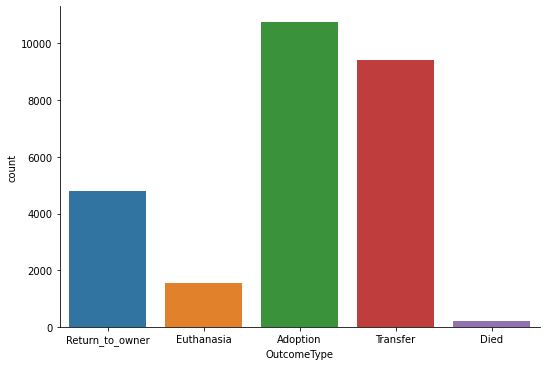

In [ ]:
sns.catplot(x='OutcomeType', data=data, kind="count", aspect=1.5)

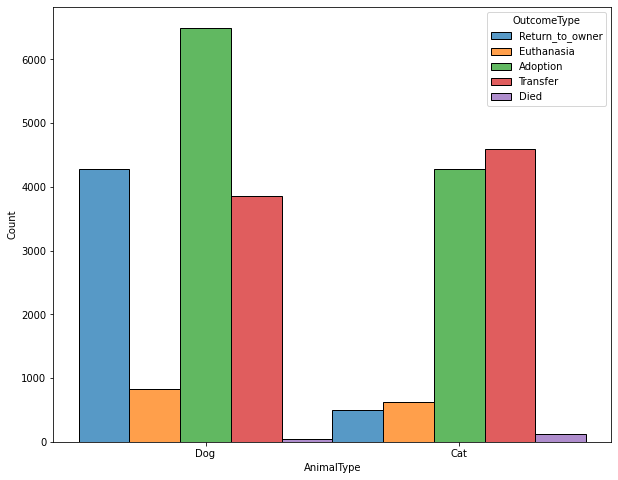

In [ ]:
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data=df_copy, x="AnimalType", ax=ax, hue="OutcomeType", multiple="dodge")

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44],
 <a list of 45 Text major ticklabel objects>)

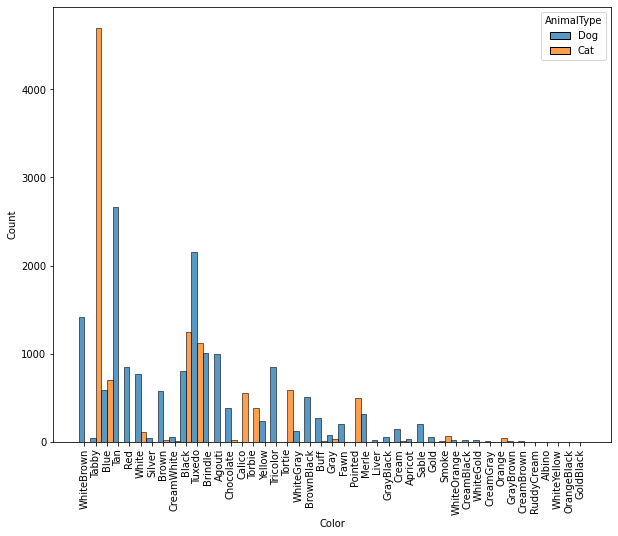

In [ ]:

fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data=df_copy, x="Color", ax=ax, hue="AnimalType", multiple="dodge")
plt.xticks(rotation=90)

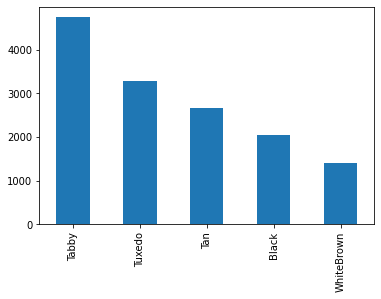

In [ ]:
df_copy["Color"].value_counts()[:5].plot(kind="bar")

plt.show()

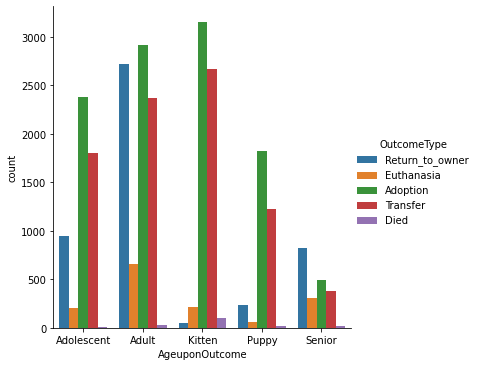

In [ ]:
#This plot is using modified dataframe "df_copy"
sns.catplot(x="AgeuponOutcome", hue="OutcomeType",data=df_copy, kind="count")
sns.set(rc={'figure.figsize':(11.7,8.27)})

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

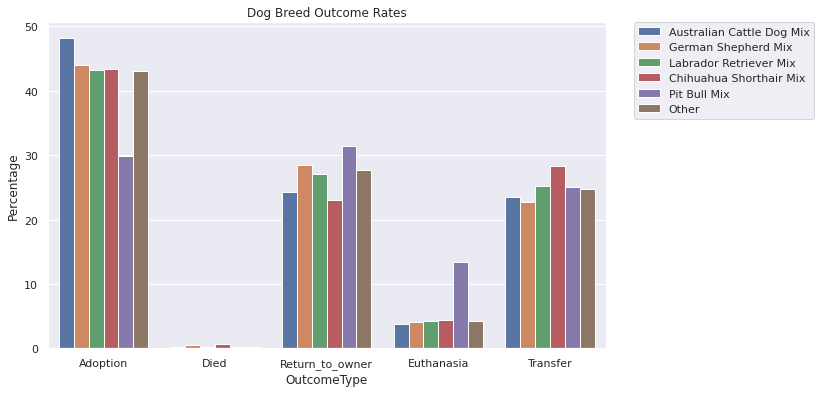

In [ ]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='OutcomeType', y='Percentage', hue='Breed', data=df_dog_breed_outcomes, ax=ax)
plt.title("Dog Breed Outcome Rates")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

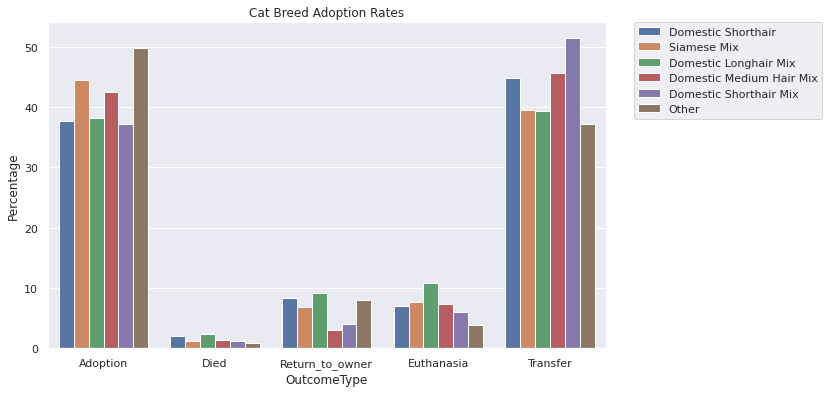

In [ ]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='OutcomeType', y='Percentage', hue='Breed', data=df_cat_breed_outcomes, ax=ax)
plt.title("Cat Breed Adoption Rates")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

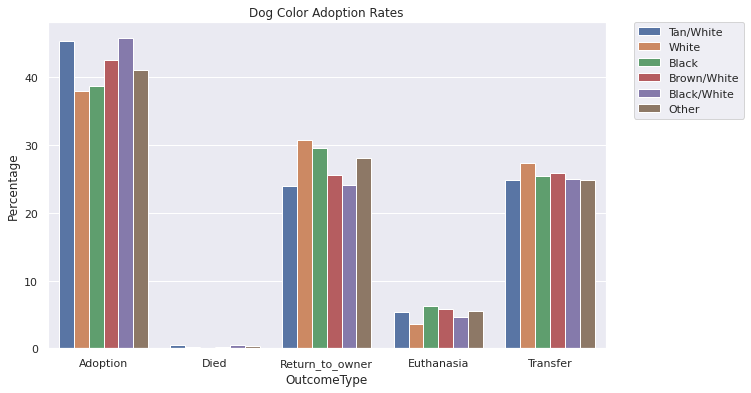

In [ ]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='OutcomeType', y='Percentage', hue='Color', data=df_dog_color_outcomes, ax=ax)
plt.title("Dog Color Adoption Rates")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

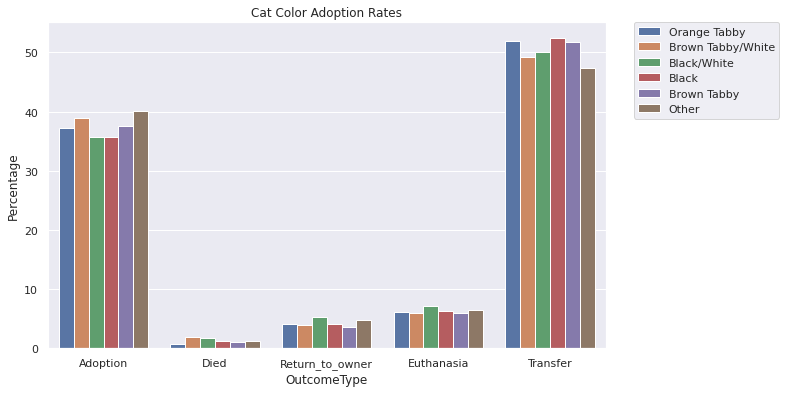

In [ ]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='OutcomeType', y='Percentage', hue='Color', data=df_cat_color_outcomes, ax=ax)
plt.title("Cat Color Adoption Rates")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=0)

#Dropping unnecessary columns

In [ ]:
#Using modified Dataframe
df_copy = df_copy.drop(["Name","DateTime","AnimalID", "OutcomeSubtype"],axis=1) 
df_copy

,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,Return_to_owner,Dog,Neutered Male,Adolescent,Shetland Sheepdog Mix,WhiteBrown
1,Euthanasia,Cat,Spayed Female,Adolescent,Domestic Shorthair Mix,Tabby
2,Adoption,Dog,Neutered Male,Adult,Pit Bull Mix,Blue
3,Transfer,Cat,Intact Male,Kitten,Domestic Shorthair Mix,Blue
4,Transfer,Dog,Neutered Male,Adult,Lhasa Apso/Miniature Poodle,Tan
...,...,...,...,...,...,...
26724,Transfer,Cat,Intact Male,Kitten,Domestic Shorthair Mix,Tabby
26725,Transfer,Cat,Spayed Female,Kitten,Domestic Shorthair Mix,Tabby
26726,Adoption,Dog,Neutered Male,Adult,Old English Bulldog Mix,Tan
26727,Transfer,Cat,Intact Male,Kitten,Domestic Shorthair Mix,Black


# **Models**

* AllDum- all data converted to dummies
* AllNb- all data is converted to floats(floats for "Outcome type" + dummies)
* Dum- data convereted to dum except "Outcome type"
* Tar- "Outcome type" num and all rest cathegorical
* OTcath- Outcome Type categorical(Return to owner,Adoption,...)

# This is supervised learning, specifically, it is a classification task.

In [ ]:

df_copy

,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,Return_to_owner,Dog,Neutered Male,Adolescent,Shetland Sheepdog Mix,WhiteBrown
1,Euthanasia,Cat,Spayed Female,Adolescent,Domestic Shorthair Mix,Tabby
2,Adoption,Dog,Neutered Male,Adult,Pit Bull Mix,Blue
3,Transfer,Cat,Intact Male,Kitten,Domestic Shorthair Mix,Blue
4,Transfer,Dog,Neutered Male,Adult,Lhasa Apso/Miniature Poodle,Tan
...,...,...,...,...,...,...
26724,Transfer,Cat,Intact Male,Kitten,Domestic Shorthair Mix,Tabby
26725,Transfer,Cat,Spayed Female,Kitten,Domestic Shorthair Mix,Tabby
26726,Adoption,Dog,Neutered Male,Adult,Old English Bulldog Mix,Tan
26727,Transfer,Cat,Intact Male,Kitten,Domestic Shorthair Mix,Black


In [ ]:
AllDum=pd.get_dummies(df_copy)
AllDum

,OutcomeType_Adoption,OutcomeType_Died,OutcomeType_Euthanasia,OutcomeType_Return_to_owner,OutcomeType_Transfer,AnimalType_Cat,AnimalType_Dog,SexuponOutcome_Intact Female,SexuponOutcome_Intact Male,SexuponOutcome_Neutered Male,SexuponOutcome_Spayed Female,AgeuponOutcome_Adolescent,AgeuponOutcome_Adult,AgeuponOutcome_Kitten,AgeuponOutcome_Puppy,AgeuponOutcome_Senior,Breed_Abyssinian Mix,Breed_Affenpinscher Mix,Breed_Afghan Hound Mix,Breed_Airedale Terrier,Breed_Airedale Terrier Mix,Breed_Airedale Terrier/Labrador Retriever,Breed_Airedale Terrier/Miniature Schnauzer,Breed_Akita,Breed_Akita Mix,Breed_Akita/Australian Cattle Dog,Breed_Akita/Chow Chow,Breed_Akita/German Shepherd,Breed_Akita/Labrador Retriever,Breed_Akita/Pit Bull,Breed_Akita/Siberian Husky,Breed_Alaskan Husky,Breed_Alaskan Husky Mix,Breed_Alaskan Husky/Australian Shepherd,Breed_Alaskan Husky/Border Collie,Breed_Alaskan Husky/German Shepherd,Breed_Alaskan Malamute,Breed_Alaskan Malamute Mix,Breed_Alaskan Malamute/Akita,Breed_Alaskan Malamute/Australian Kelpie,...,Color_Brindle,Color_Brown,Color_BrownBlack,Color_Buff,Color_Calico,Color_Chocolate,Color_Cream,Color_CreamBlack,Color_CreamBrown,Color_CreamGray,Color_CreamWhite,Color_Fawn,Color_Gold,Color_GoldBlack,Color_Gray,Color_GrayBlack,Color_GrayBrown,Color_Liver,Color_Merle,Color_Orange,Color_OrangeBlack,Color_Pointed,Color_Red,Color_RuddyCream,Color_Sable,Color_Silver,Color_Smoke,Color_Tabby,Color_Tan,Color_Torbie,Color_Tortie,Color_Tricolor,Color_Tuxedo,Color_White,Color_WhiteBrown,Color_WhiteGold,Color_WhiteGray,Color_WhiteOrange,Color_WhiteYellow,Color_Yellow
0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26724,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
26725,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
26726,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
26727,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
A=df_copy.drop('OutcomeType',axis=1)
Dum=pd.get_dummies(A)
Dum

,AnimalType_Cat,AnimalType_Dog,SexuponOutcome_Intact Female,SexuponOutcome_Intact Male,SexuponOutcome_Neutered Male,SexuponOutcome_Spayed Female,AgeuponOutcome_Adolescent,AgeuponOutcome_Adult,AgeuponOutcome_Kitten,AgeuponOutcome_Puppy,AgeuponOutcome_Senior,Breed_Abyssinian Mix,Breed_Affenpinscher Mix,Breed_Afghan Hound Mix,Breed_Airedale Terrier,Breed_Airedale Terrier Mix,Breed_Airedale Terrier/Labrador Retriever,Breed_Airedale Terrier/Miniature Schnauzer,Breed_Akita,Breed_Akita Mix,Breed_Akita/Australian Cattle Dog,Breed_Akita/Chow Chow,Breed_Akita/German Shepherd,Breed_Akita/Labrador Retriever,Breed_Akita/Pit Bull,Breed_Akita/Siberian Husky,Breed_Alaskan Husky,Breed_Alaskan Husky Mix,Breed_Alaskan Husky/Australian Shepherd,Breed_Alaskan Husky/Border Collie,Breed_Alaskan Husky/German Shepherd,Breed_Alaskan Malamute,Breed_Alaskan Malamute Mix,Breed_Alaskan Malamute/Akita,Breed_Alaskan Malamute/Australian Kelpie,Breed_Alaskan Malamute/Border Collie,Breed_Alaskan Malamute/German Shepherd,Breed_American Bulldog,Breed_American Bulldog Mix,Breed_American Bulldog/American Staffordshire Terrier,...,Color_Brindle,Color_Brown,Color_BrownBlack,Color_Buff,Color_Calico,Color_Chocolate,Color_Cream,Color_CreamBlack,Color_CreamBrown,Color_CreamGray,Color_CreamWhite,Color_Fawn,Color_Gold,Color_GoldBlack,Color_Gray,Color_GrayBlack,Color_GrayBrown,Color_Liver,Color_Merle,Color_Orange,Color_OrangeBlack,Color_Pointed,Color_Red,Color_RuddyCream,Color_Sable,Color_Silver,Color_Smoke,Color_Tabby,Color_Tan,Color_Torbie,Color_Tortie,Color_Tricolor,Color_Tuxedo,Color_White,Color_WhiteBrown,Color_WhiteGold,Color_WhiteGray,Color_WhiteOrange,Color_WhiteYellow,Color_Yellow
0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26724,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
26725,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
26726,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
26727,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
OTcath=df_copy["OutcomeType"]
OTcath

0        Return_to_owner
1             Euthanasia
2               Adoption
3               Transfer
4               Transfer
              ...       
26724           Transfer
26725           Transfer
26726           Adoption
26727           Transfer
26728           Transfer
Name: OutcomeType, Length: 25621, dtype: object

In [ ]:
#convert outcomes to numerical values
df_copy.loc[(df_copy['OutcomeType'].str.contains('Adoption', case=False)),'OutcomeType']= "1.0"
df_copy.loc[(df_copy['OutcomeType'].str.contains('Return_to_Owner', case=False)),'OutcomeType']= "2.0"
df_copy.loc[(df_copy['OutcomeType'].str.contains('Euthanasia', case=False)),'OutcomeType']= "3.0"
df_copy.loc[(df_copy['OutcomeType'].str.contains('Transfer', case=False)),'OutcomeType']= "4.0"
df_copy.loc[(df_copy['OutcomeType'].str.contains('Died', case=False)),'OutcomeType']= "3.0"

df_copy["OutcomeType"] = pd.to_numeric(df_copy["OutcomeType"])
df_copy["OutcomeType"]

0        2.0
1        3.0
2        1.0
3        4.0
4        4.0
        ... 
26724    4.0
26725    4.0
26726    1.0
26727    4.0
26728    4.0
Name: OutcomeType, Length: 25621, dtype: float64

In [ ]:
Tar = df_copy
Tar

,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,2.0,Dog,Neutered Male,Adolescent,Shetland Sheepdog Mix,WhiteBrown
1,3.0,Cat,Spayed Female,Adolescent,Domestic Shorthair Mix,Tabby
2,1.0,Dog,Neutered Male,Adult,Pit Bull Mix,Blue
3,4.0,Cat,Intact Male,Kitten,Domestic Shorthair Mix,Blue
4,4.0,Dog,Neutered Male,Adult,Lhasa Apso/Miniature Poodle,Tan
...,...,...,...,...,...,...
26724,4.0,Cat,Intact Male,Kitten,Domestic Shorthair Mix,Tabby
26725,4.0,Cat,Spayed Female,Kitten,Domestic Shorthair Mix,Tabby
26726,1.0,Dog,Neutered Male,Adult,Old English Bulldog Mix,Tan
26727,4.0,Cat,Intact Male,Kitten,Domestic Shorthair Mix,Black


In [ ]:
AllNb= pd.get_dummies(Tar)
AllNb

,OutcomeType,AnimalType_Cat,AnimalType_Dog,SexuponOutcome_Intact Female,SexuponOutcome_Intact Male,SexuponOutcome_Neutered Male,SexuponOutcome_Spayed Female,AgeuponOutcome_Adolescent,AgeuponOutcome_Adult,AgeuponOutcome_Kitten,AgeuponOutcome_Puppy,AgeuponOutcome_Senior,Breed_Abyssinian Mix,Breed_Affenpinscher Mix,Breed_Afghan Hound Mix,Breed_Airedale Terrier,Breed_Airedale Terrier Mix,Breed_Airedale Terrier/Labrador Retriever,Breed_Airedale Terrier/Miniature Schnauzer,Breed_Akita,Breed_Akita Mix,Breed_Akita/Australian Cattle Dog,Breed_Akita/Chow Chow,Breed_Akita/German Shepherd,Breed_Akita/Labrador Retriever,Breed_Akita/Pit Bull,Breed_Akita/Siberian Husky,Breed_Alaskan Husky,Breed_Alaskan Husky Mix,Breed_Alaskan Husky/Australian Shepherd,Breed_Alaskan Husky/Border Collie,Breed_Alaskan Husky/German Shepherd,Breed_Alaskan Malamute,Breed_Alaskan Malamute Mix,Breed_Alaskan Malamute/Akita,Breed_Alaskan Malamute/Australian Kelpie,Breed_Alaskan Malamute/Border Collie,Breed_Alaskan Malamute/German Shepherd,Breed_American Bulldog,Breed_American Bulldog Mix,...,Color_Brindle,Color_Brown,Color_BrownBlack,Color_Buff,Color_Calico,Color_Chocolate,Color_Cream,Color_CreamBlack,Color_CreamBrown,Color_CreamGray,Color_CreamWhite,Color_Fawn,Color_Gold,Color_GoldBlack,Color_Gray,Color_GrayBlack,Color_GrayBrown,Color_Liver,Color_Merle,Color_Orange,Color_OrangeBlack,Color_Pointed,Color_Red,Color_RuddyCream,Color_Sable,Color_Silver,Color_Smoke,Color_Tabby,Color_Tan,Color_Torbie,Color_Tortie,Color_Tricolor,Color_Tuxedo,Color_White,Color_WhiteBrown,Color_WhiteGold,Color_WhiteGray,Color_WhiteOrange,Color_WhiteYellow,Color_Yellow
0,2.0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,3.0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4.0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4.0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26724,4.0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
26725,4.0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
26726,1.0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
26727,4.0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**MODEL: Linear Regression**

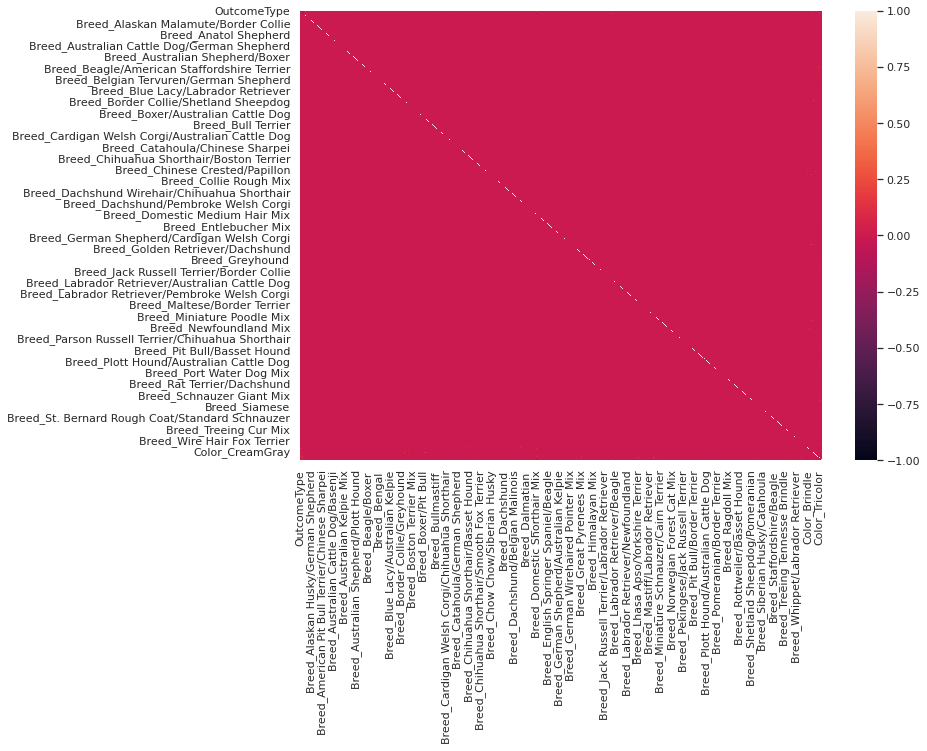

In [ ]:
import seaborn as sns
corr_matrix = AllNb.corr()
sns.heatmap(corr_matrix)

In [ ]:
corr_matrix["OutcomeType"].sort_values(ascending=False)

OutcomeType                     1.000000
SexuponOutcome_Intact Female    0.371420
SexuponOutcome_Intact Male      0.345746
AnimalType_Cat                  0.158852
Breed_Domestic Shorthair Mix    0.150771
                                  ...   
Color_Agouti                   -0.040485
Color_Tan                      -0.042882
AnimalType_Dog                 -0.158852
SexuponOutcome_Neutered Male   -0.241249
SexuponOutcome_Spayed Female   -0.272423
Name: OutcomeType, Length: 1435, dtype: float64

In [ ]:
df_copy

,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,2.0,Dog,Neutered Male,Adolescent,Shetland Sheepdog Mix,WhiteBrown
1,3.0,Cat,Spayed Female,Adolescent,Domestic Shorthair Mix,Tabby
2,1.0,Dog,Neutered Male,Adult,Pit Bull Mix,Blue
3,4.0,Cat,Intact Male,Kitten,Domestic Shorthair Mix,Blue
4,4.0,Dog,Neutered Male,Adult,Lhasa Apso/Miniature Poodle,Tan
...,...,...,...,...,...,...
26724,4.0,Cat,Intact Male,Kitten,Domestic Shorthair Mix,Tabby
26725,4.0,Cat,Spayed Female,Kitten,Domestic Shorthair Mix,Tabby
26726,1.0,Dog,Neutered Male,Adult,Old English Bulldog Mix,Tan
26727,4.0,Cat,Intact Male,Kitten,Domestic Shorthair Mix,Black


In [ ]:
# our target variable is "OutcomeType"
# split the data into training and testing sets
X = Dum
y = df_copy['OutcomeType']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                random_state=10)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
import numpy as np
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
rmse

200909419373.9122

**MODEL: Support Vector Machines** 

In [ ]:
from sklearn.model_selection import train_test_split
# test_size=0.3 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)

In [ ]:
from sklearn.svm import SVC 
model = SVC(kernel = "linear")

In [ ]:
 model.fit(X_train, y_train) 
 y_model = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test, y_model)

0.6175360999089372

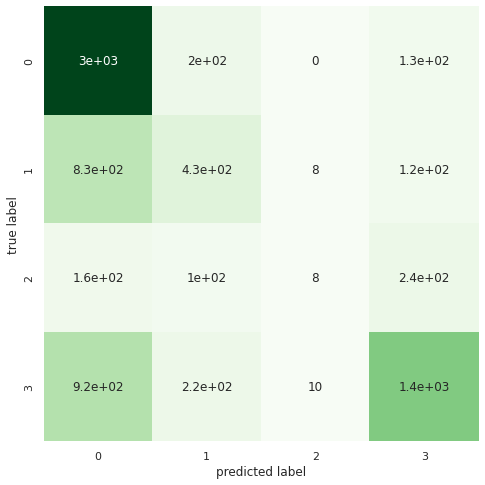

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_model)
plt.figure(figsize=(8,8))
sns.heatmap(mat, square=True, annot=True , cbar=False, cmap="Greens") 
plt.xlabel('predicted label')
plt.ylabel('true label');

**MODEL: Random Forests**

**Step 1: Arrange data into features matrix and target vector**

In [ ]:
# our target vector is 'OutcomeType' 
y=df_copy["OutcomeType"]
X=Dum
X


,AnimalType_Cat,AnimalType_Dog,SexuponOutcome_Intact Female,SexuponOutcome_Intact Male,SexuponOutcome_Neutered Male,SexuponOutcome_Spayed Female,SexuponOutcome_Unknown,AgeuponOutcome_Adolescent,AgeuponOutcome_Adult,AgeuponOutcome_Kitten,AgeuponOutcome_Puppy,AgeuponOutcome_Senior,Breed_Abyssinian Mix,Breed_Affenpinscher Mix,Breed_Afghan Hound Mix,Breed_Airedale Terrier,Breed_Airedale Terrier Mix,Breed_Airedale Terrier/Labrador Retriever,Breed_Airedale Terrier/Miniature Schnauzer,Breed_Akita,Breed_Akita Mix,Breed_Akita/Australian Cattle Dog,Breed_Akita/Chow Chow,Breed_Akita/German Shepherd,Breed_Akita/Labrador Retriever,Breed_Akita/Pit Bull,Breed_Akita/Siberian Husky,Breed_Alaskan Husky,Breed_Alaskan Husky Mix,Breed_Alaskan Husky/Australian Shepherd,Breed_Alaskan Husky/Border Collie,Breed_Alaskan Husky/German Shepherd,Breed_Alaskan Malamute,Breed_Alaskan Malamute Mix,Breed_Alaskan Malamute/Akita,Breed_Alaskan Malamute/Australian Kelpie,Breed_Alaskan Malamute/Border Collie,Breed_Alaskan Malamute/German Shepherd,Breed_American Bulldog,Breed_American Bulldog Mix,...,Color_Brindle,Color_Brown,Color_BrownBlack,Color_Buff,Color_Calico,Color_Chocolate,Color_Cream,Color_CreamBlack,Color_CreamBrown,Color_CreamGray,Color_CreamWhite,Color_Fawn,Color_Gold,Color_GoldBlack,Color_Gray,Color_GrayBlack,Color_GrayBrown,Color_Liver,Color_Merle,Color_Orange,Color_OrangeBlack,Color_Pointed,Color_Red,Color_RuddyCream,Color_Sable,Color_Silver,Color_Smoke,Color_Tabby,Color_Tan,Color_Torbie,Color_Tortie,Color_Tricolor,Color_Tuxedo,Color_White,Color_WhiteBrown,Color_WhiteGold,Color_WhiteGray,Color_WhiteOrange,Color_WhiteYellow,Color_Yellow
0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26724,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
26725,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
26726,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
26727,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_copy.shape

(25621, 6)

In [ ]:
X.shape

(25621, 1434)

In [ ]:
y.shape

(25621,)

**Step 2. Split the data into train and test sets**

In [ ]:
from sklearn.model_selection import train_test_split
# test_size=0.3 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# we choose to have 1000 decision trees
model = RandomForestClassifier(n_estimators=1000)

In [ ]:
model.fit(X_train, y_train)    


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = model.predict(X_test) 

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6029660465721348

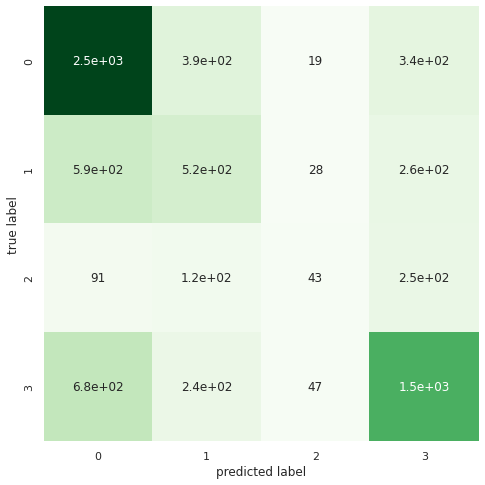

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,8))
sns.heatmap(mat, square=True, annot=True , cbar=False, cmap="Greens") 
plt.xlabel('predicted label')
plt.ylabel('true label');

#**BINARY DATA TARGET**
"Outcome type" :

1- Adoption,Return to Owner, Transfer

0- Died, Euthanasia

**MODEL: Binary Logistic Regression**

In [ ]:
df_copy2

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan
...,...,...,...,...,...,...,...,...,...,...
26724,A702446,NaN,2015-05-14 11:56:00,Transfer,Partner,Cat,Intact Male,1 month,Domestic Shorthair Mix,Brown Tabby/White
26725,A718934,NaN,2016-01-20 18:59:00,Transfer,SCRP,Cat,Spayed Female,3 months,Domestic Shorthair Mix,Brown Tabby
26726,A698128,Zeus,2015-03-09 13:33:00,Adoption,NaN,Dog,Neutered Male,4 years,Old English Bulldog Mix,White/Tan
26727,A677478,NaN,2014-04-27 12:22:00,Transfer,Partner,Cat,Intact Male,4 weeks,Domestic Shorthair Mix,Black


In [ ]:
df_copy2.dropna(subset= ['AgeuponOutcome'],inplace=True)
df_copy2.dropna(subset= ['SexuponOutcome'],inplace=True)
df_copy2 = df_copy2.drop(["Name","DateTime","AnimalID", "OutcomeSubtype"],axis=1) 
df_copy2

,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,Return_to_owner,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,Euthanasia,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,Adoption,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,Transfer,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,Transfer,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan
...,...,...,...,...,...,...
26724,Transfer,Cat,Intact Male,1 month,Domestic Shorthair Mix,Brown Tabby/White
26725,Transfer,Cat,Spayed Female,3 months,Domestic Shorthair Mix,Brown Tabby
26726,Adoption,Dog,Neutered Male,4 years,Old English Bulldog Mix,White/Tan
26727,Transfer,Cat,Intact Male,4 weeks,Domestic Shorthair Mix,Black


In [ ]:
#convert outcomes to numbers(still strings)
df_copy2.loc[(df_copy2['OutcomeType'].str.contains('Adoption', case=False)),'OutcomeType']= '1'
df_copy2.loc[(df_copy2['OutcomeType'].str.contains('Return_to_Owner', case=False)),'OutcomeType']= '1'
df_copy2.loc[(df_copy2['OutcomeType'].str.contains('Euthanasia', case=False)),'OutcomeType']= '0'
df_copy2.loc[(df_copy2['OutcomeType'].str.contains('Transfer', case=False)),'OutcomeType']= '1'
df_copy2.loc[(df_copy2['OutcomeType'].str.contains('Died', case=False)),'OutcomeType']= '0'


In [ ]:

#convert to Int64
df_copy2['OutcomeType']= df_copy2['OutcomeType'].astype(str).astype(int)
df_copy2["OutcomeType"]

0        1
1        0
2        1
3        1
4        1
        ..
26724    1
26725    1
26726    1
26727    1
26728    1
Name: OutcomeType, Length: 26710, dtype: int64

In [ ]:
# converting categorical values to numerical ones
X=pd.get_dummies(df_copy2)
X

,OutcomeType,AnimalType_Cat,AnimalType_Dog,SexuponOutcome_Intact Female,SexuponOutcome_Intact Male,SexuponOutcome_Neutered Male,SexuponOutcome_Spayed Female,SexuponOutcome_Unknown,AgeuponOutcome_0 years,AgeuponOutcome_1 day,AgeuponOutcome_1 month,AgeuponOutcome_1 week,AgeuponOutcome_1 weeks,AgeuponOutcome_1 year,AgeuponOutcome_10 months,AgeuponOutcome_10 years,AgeuponOutcome_11 months,AgeuponOutcome_11 years,AgeuponOutcome_12 years,AgeuponOutcome_13 years,AgeuponOutcome_14 years,AgeuponOutcome_15 years,AgeuponOutcome_16 years,AgeuponOutcome_17 years,AgeuponOutcome_18 years,AgeuponOutcome_19 years,AgeuponOutcome_2 days,AgeuponOutcome_2 months,AgeuponOutcome_2 weeks,AgeuponOutcome_2 years,AgeuponOutcome_20 years,AgeuponOutcome_3 days,AgeuponOutcome_3 months,AgeuponOutcome_3 weeks,AgeuponOutcome_3 years,AgeuponOutcome_4 days,AgeuponOutcome_4 months,AgeuponOutcome_4 weeks,AgeuponOutcome_4 years,AgeuponOutcome_5 days,...,Color_White/Blue Merle,Color_White/Blue Tabby,Color_White/Blue Tick,Color_White/Brown,Color_White/Brown Brindle,Color_White/Brown Merle,Color_White/Brown Tabby,Color_White/Brown Tiger,Color_White/Buff,Color_White/Calico,Color_White/Chocolate,Color_White/Chocolate Point,Color_White/Cream,Color_White/Cream Tabby,Color_White/Flame Point,Color_White/Gold,Color_White/Gray,Color_White/Gray Tabby,Color_White/Liver,Color_White/Lynx Point,Color_White/Orange,Color_White/Orange Tabby,Color_White/Pink,Color_White/Red,Color_White/Red Merle,Color_White/Red Tick,Color_White/Silver,Color_White/Tan,Color_White/Tricolor,Color_White/White,Color_White/Yellow,Color_White/Yellow Brindle,Color_Yellow,Color_Yellow Brindle,Color_Yellow Brindle/Blue,Color_Yellow Brindle/Tan,Color_Yellow Brindle/White,Color_Yellow/Black,Color_Yellow/White,Color_Yellow/Yellow
0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26724,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26725,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26726,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
26727,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# our target vector is 'OutcomeType' 
y=df_copy2["OutcomeType"]
X=X.drop("OutcomeType",axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
# test_size=0.3 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9356046424560089

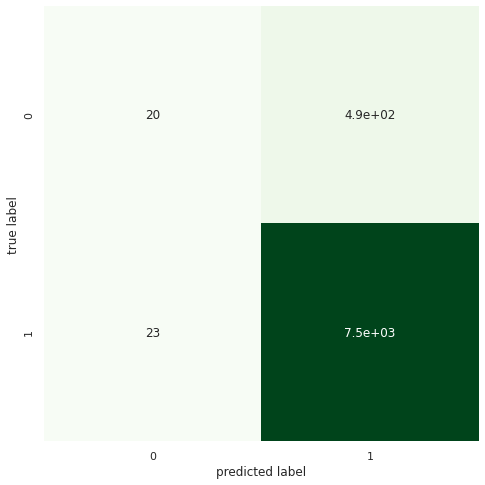

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,8))
sns.heatmap(mat, square=True, annot=True , cbar=False, cmap="Greens") 
plt.xlabel('predicted label')
plt.ylabel('true label');

**MODEL: Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# we choose to have 500 decision trees
model = RandomForestClassifier(n_estimators=500)

In [ ]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9299887682515912

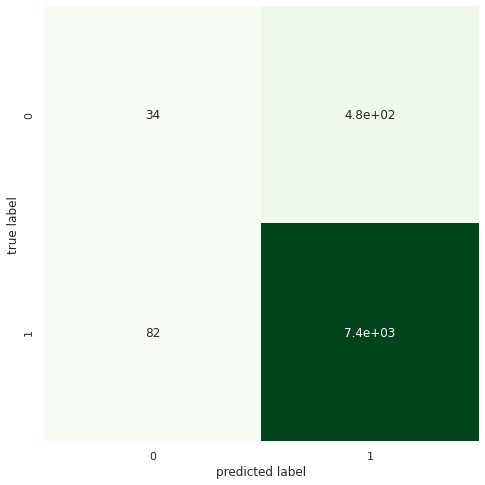

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,8))
sns.heatmap(mat, square=True, annot=True , cbar=False, cmap="Greens") 
plt.xlabel('predicted label')
plt.ylabel('true label');